In [1]:
import numpy as np
from numpy import genfromtxt
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import csv
from scipy.io import loadmat
import math
%matplotlib inline

In [2]:
X = genfromtxt('mydata.csv', delimiter=',')

In [3]:
X.shape

(5101, 36)

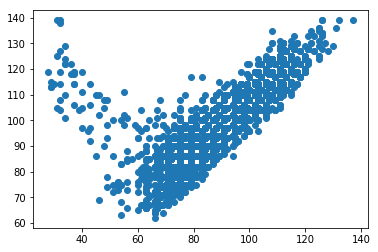

In [7]:
plt.scatter(X[:,1], X[:,2])
plt.show()
#fig, ax = plt.subplots(figsize=(200, 200))
#ax.scatter(X[:,0], X[:,1])

In [8]:
X[1,:]

array([  46.,   40.,  119.,  139.,   42.,   30.,  135.,  157.,   42.,
         30.,  140.,  150.,   50.,   43.,  110.,  115.,   44.,   34.,
        129.,  143.,   42.,   29.,  135.,  150.,   50.,   40.,  115.,
        113.,   50.,   46.,  111.,  116.,   44.,   31.,  131.,  142.])

In [9]:
def estimateGaussian(X):
    mu = X.mean(axis=0)
    sigma = X.var(axis=0)
    return mu, sigma

In [20]:
mus = np.zeros(shape=(X.shape[1]))
sigmas = np.zeros(shape=(X.shape[1]))

In [21]:
mus.shape
sigmas.shape

(36,)

In [22]:
mus

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [23]:
sigmas

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [24]:
sigmas.shape

(36,)

In [25]:
X.shape

(5101, 36)

In [26]:
mus.shape

(36,)

In [27]:
X.shape

(5101, 36)

In [33]:
for i in range(1, X.shape[1]):
    [mu, sigma] = estimateGaussian(X[i][:])
    mus[i - 1] = mu;
    sigmas[i - 1] = sigma;
    print('mu -> {}'.format(mu))
    print('sigma -> {}'.format(sigma))

mu -> 85.63888888888889
sigma -> 2149.175154320988
mu -> 85.33333333333333
sigma -> 1872.611111111111
mu -> 85.0
sigma -> 410.5
mu -> 59.916666666666664
sigma -> 67.52083333333333
mu -> 85.25
sigma -> 2278.6875
mu -> 81.33333333333333
sigma -> 1244.7777777777778
mu -> 59.27777777777778
sigma -> 93.97839506172839
mu -> 87.52777777777777
sigma -> 2507.6381172839506
mu -> 72.19444444444444
sigma -> 1247.7121913580247
mu -> 77.80555555555556
sigma -> 213.48996913580245
mu -> 75.80555555555556
sigma -> 1272.2677469135804
mu -> 67.19444444444444
sigma -> 96.87885802469137
mu -> 71.86111111111111
sigma -> 334.9529320987654
mu -> 79.05555555555556
sigma -> 1661.1635802469136
mu -> 72.44444444444444
sigma -> 122.02469135802468
mu -> 75.72222222222223
sigma -> 71.81172839506172
mu -> 81.83333333333333
sigma -> 1793.361111111111
mu -> 80.27777777777777
sigma -> 1797.4228395061732
mu -> 81.86111111111111
sigma -> 861.008487654321
mu -> 71.55555555555556
sigma -> 213.6358024691358
mu -> 87.97222222

In [34]:
mus

array([ 85.63888889,  85.33333333,  85.        ,  59.91666667,
        85.25      ,  81.33333333,  59.27777778,  87.52777778,
        72.19444444,  77.80555556,  75.80555556,  67.19444444,
        71.86111111,  79.05555556,  72.44444444,  75.72222222,
        81.83333333,  80.27777778,  81.86111111,  71.55555556,
        87.97222222,  82.58333333,  78.86111111,  67.52777778,
        71.58333333,  69.02777778,  74.55555556,  88.75      ,
        78.69444444,  82.75      ,  72.38888889,  75.30555556,
        75.38888889,  79.11111111,  72.44444444,  72.44444444])

In [35]:
sigmas

array([ 2149.17515432,  1872.61111111,   410.5       ,    67.52083333,
        2278.6875    ,  1244.77777778,    93.97839506,  2507.63811728,
        1247.71219136,   213.48996914,  1272.26774691,    96.87885802,
         334.9529321 ,  1661.16358025,   122.02469136,    71.8117284 ,
        1793.36111111,  1797.42283951,   861.00848765,   213.63580247,
        2483.97145062,  1082.13194444,   200.34182099,   862.52700617,
         935.57638889,    83.30478395,  1234.08024691,  2720.52083333,
         640.6566358 ,  1500.29861111,   144.90432099,   828.32330247,
         444.84876543,  1575.7654321 ,   119.63580247,   119.63580247])

In [36]:
np.transpose(mus[:]).shape

(36,)

In [90]:
X.shape

(5101, 36)

In [44]:
def mvGaussian(X, mus, sigmas):
    tmp1 = np.exp( -((X[1:] - mus) ** 2)/(2 * sigmas) )
    tmp2 = ( 1 / ( np.sqrt((2 * np.pi)) * np.sqrt(sigmas) ) )  
    #tmp2 = 1 / (np.sqrt((2 * math.pi)) * np.sqrt(sigmas))
    tmp3 = np.dot(tmp1, np.transpose(tmp2))
    print('tmp1 => {}'.format(tmp1))
    print('tmp1.shape -> {}'.format(tmp1.shape))
    print('tmp2 => {}'.format(tmp2))
    print('tmp2.shape -> {}'.format(tmp2.shape))
    print('tmp3 => {}'.format(tmp3))
    print('tmp3.shape -> {}'.format(tmp3.shape))
    return tmp3

In [45]:
pval = mvGaussian(X, mus, sigmas)

tmp1 => [[  6.93818247e-01   5.77683724e-01   2.44622524e-01 ...,   4.79763601e-01
    5.97828248e-07   1.65478208e-09]
 [  7.06569208e-01   5.35926810e-01   2.44622524e-01 ...,   4.50771456e-01
    2.20895390e-07   9.21360244e-10]
 [  9.92629789e-01   9.75358379e-01   7.60289476e-01 ...,   9.95212730e-01
    9.83746442e-02   9.89937967e-01]
 ..., 
 [  9.30173941e-01   9.71892188e-01   5.25010942e-01 ...,   8.70702301e-01
    1.55825814e-02   5.17450644e-01]
 [  9.51366740e-01   9.99258589e-01   5.25010942e-01 ...,   9.56141038e-01
    1.55825814e-02   5.17450644e-01]
 [  9.51366740e-01   9.91462764e-01   7.60289476e-01 ...,   9.56141038e-01
    4.18603055e-02   7.36446882e-01]]
tmp1.shape -> (5100, 36)
tmp2 => [ 0.00860546  0.00921905  0.01969035  0.04855022  0.00835733  0.01130744
  0.04115248  0.00796668  0.01129413  0.02730369  0.01118461  0.04053177
  0.02179808  0.00978822  0.03611488  0.04707739  0.00942055  0.0094099
  0.01359585  0.02729437  0.00800455  0.01212746  0.0281854  

In [48]:
pval

array([ 0.13457544,  0.18910419,  0.37888474, ...,  0.35256152,
        0.36855579,  0.38426165])

In [49]:
pval.shape

(5100,)

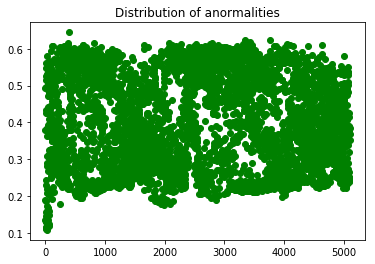

In [50]:
plt.plot(pval, 'go')
plt.title("Distribution of anormalities")
plt.xlabel("")

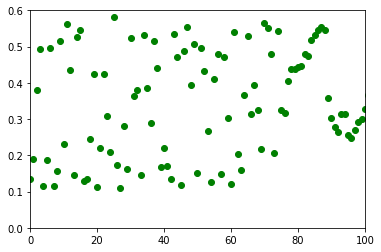

In [51]:
plt.plot(pval, 'go')
plt.axis([0, 100, 0, 0.6])
plt.show()

In [52]:
epsilon = 0.20

In [53]:
outliers = np.zeros(shape=(2, X.shape[0]))

In [54]:
outliers.shape

(2, 5101)

In [55]:
for i in range(0, len(pval)):
    if pval[i] < epsilon:
        outliers[1][i] = int(1)
    else:
        outliers[1][i] = int(0)
    outliers[0][i] = pval[i]

In [56]:
outliers

array([[ 0.13457544,  0.18910419,  0.37888474, ...,  0.36855579,
         0.38426165,  0.        ],
       [ 1.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [271]:
X.shape

(5101, 36)